<a href="https://colab.research.google.com/github/computacao-aplicada/lab01-intro-yLorenam/blob/main/ExercicioAula01_Introducao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 01: Introdução à Visão Computacional e Computação Gráfica

### 🎯 Objetivos da Aula
- Compreender o que é Visão Computacional.
- Diferenciar Visão Computacional, Processamento de Imagens e Computação Gráfica.
- Realizar manipulações simples com imagens.
- Explorar conceitos de pixels, resoluções e canais de cor.


## O que é Visão Computacional?

A **Visão Computacional** é uma área da Inteligência Artificial que busca permitir que os computadores 'vejam' e interpretem o mundo visual, assim como os humanos.

Ela utiliza imagens e vídeos como entrada e tenta extrair informações úteis, como:
- Detecção de objetos
- Reconhecimento facial
- Segmentação de imagem
- Rastreamento de movimento

A **Computação Gráfica**, por outro lado, está mais voltada à geração de imagens — como renderizar cenas em 3D.

Já o **Processamento de Imagens** se concentra na transformação e análise de imagens (normalmente 2D) para melhorar a qualidade ou extrair características.

| Área                  | Foco                             |
|-----------------------|----------------------------------|
| Visão Computacional   | Entendimento e interpretação     |
| Computação Gráfica    | Geração de imagens               |
| Processamento de Imagens | Manipulação e melhoria de imagens |


In [ ]:
# Importação das bibliotecas necessárias
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Exibir gráficos inline
%matplotlib inline


## Exemplo prático: Carregar e visualizar uma imagem

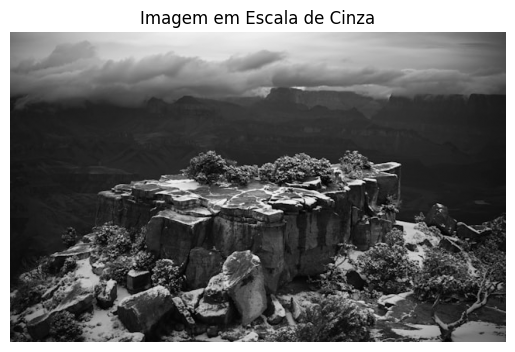

In [ ]:
# Carregar imagem de exemplo
from PIL import Image
import requests

url = "https://images.unsplash.com/photo-1745810187217-4d9e1ccfd9d5?ixlib=rb-4.1.0&q=85&fm=jpg&crop=entropy&cs=srgb&w=640"
image = Image.open(requests.get(url, stream=True).raw)
gray_image = image.convert("L")  # Garante 3 canais

# Mostrar imagem

plt.imshow(gray_image, cmap='gray')
plt.title("Imagem em Escala de Cinza")
plt.axis('off')
plt.show()


## Manipulação dos canais RGB

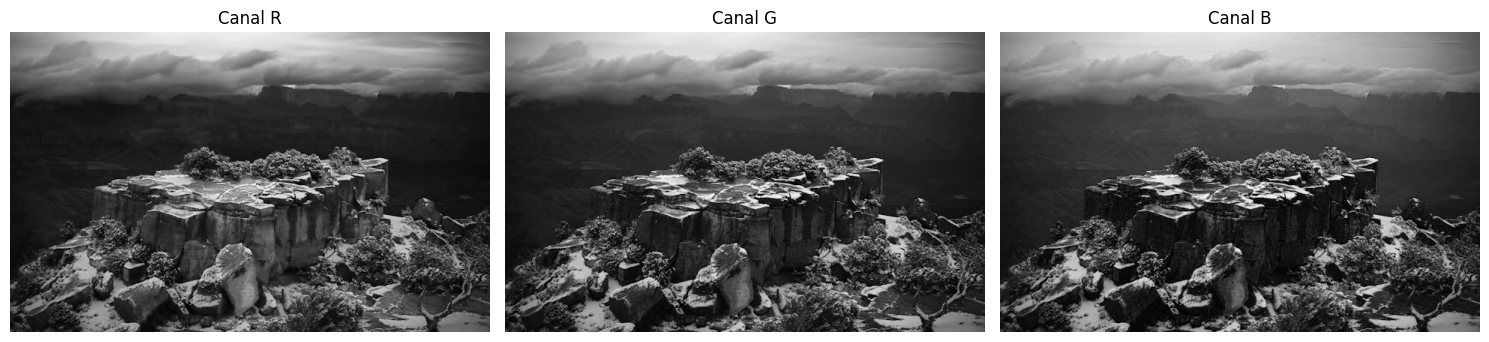

In [ ]:
# Separar os canais
r, g, b = image.split()

# Exibir os canais
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for ax, channel, color in zip(axs, [r, g, b], ['R', 'G', 'B']):
    ax.imshow(channel, cmap='gray')
    ax.set_title(f'Canal {color}')
    ax.axis('off')
plt.tight_layout()
plt.show()


## Conversão para escala de cinza

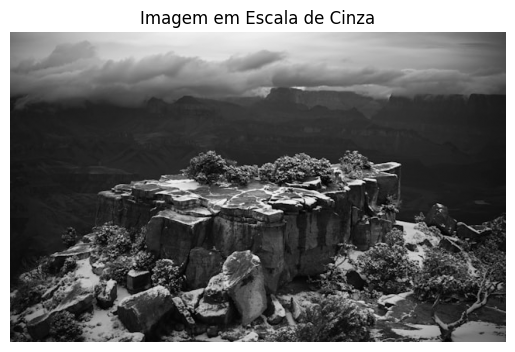

In [ ]:
# Converter para escala de cinza
gray_image = image.convert("L")

# Mostrar imagem em tons de cinza
plt.imshow(gray_image, cmap='gray')
plt.title("Imagem em Escala de Cinza")
plt.axis('off')
plt.show()


##Exibir apenas o canal vermelho da imagem

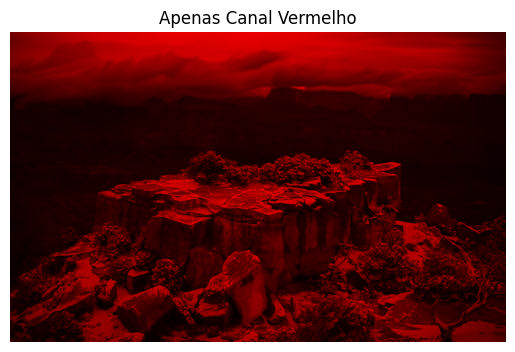

In [ ]:
r_img = Image.merge("RGB", (r, Image.new("L", r.size), Image.new("L", r.size)))

plt.imshow(r_img)
plt.title("Apenas Canal Vermelho")
plt.axis('off')
plt.show()


##Modificar aleatoriamente o canal vermelho

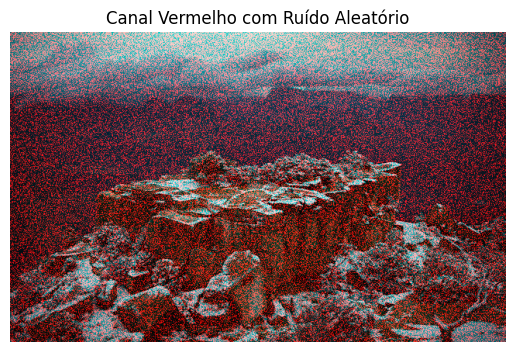

In [ ]:
r_array = np.array(r).astype(np.int16)
noise = np.random.randint(-255, 255, r_array.shape)
r_noisy = np.clip(r_array + noise, 0, 255).astype(np.uint8)
r_noisy_img = Image.fromarray(r_noisy)

noisy_image = Image.merge("RGB", (r_noisy_img, g, b))

plt.imshow(noisy_image)
plt.title("Canal Vermelho com Ruído Aleatório")
plt.axis('off')
plt.show()


##Criar imagem negativa

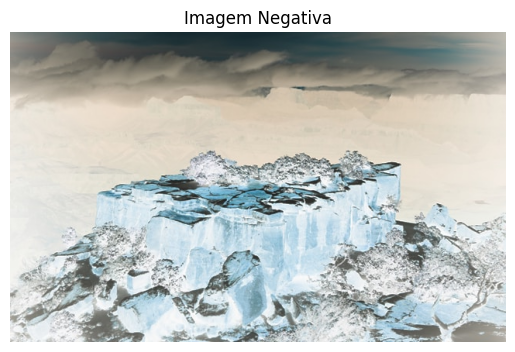

In [ ]:
inv_image = Image.fromarray(255 - np.array(image))

plt.imshow(inv_image)
plt.title("Imagem Negativa")
plt.axis('off')
plt.show()


##Salvar imagem negativa no disco

In [ ]:
inv_image.save("imagem_negativa.jpg")
print("Imagem negativa salva como 'imagem_negativa.jpg'")


Imagem negativa salva como 'imagem_negativa.jpg'


##Recortar pedaço da imagem e salvar

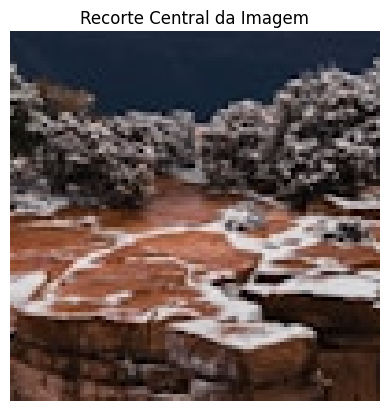

Recorte salvo como 'recorte_imagem.jpg'


In [ ]:
width, height = image.size
left = width // 2 - 50
top = height // 2 - 50
right = width // 2 + 50
bottom = height // 2 + 50

cropped_image = image.crop((left, top, right, bottom))
cropped_image.save("recorte_imagem.jpg")

plt.imshow(cropped_image)
plt.title("Recorte Central da Imagem")
plt.axis('off')
plt.show()

print("Recorte salvo como 'recorte_imagem.jpg'")


## 🧠 Exercício

Tente modificar o código acima para:

- Exibir apenas o canal vermelho da imagem.
- Modifique aleatoriamente o canal vermelho e gere a imagem novamente.
- Criar uma imagem negativa (inverter as cores).
- Salvar uma nova imagem modificada no disco.
- Recorte um pedaço da imagem e salve em disco.

---
Cada um dos pontos do exercício deve ser uma célula separada!
